In [33]:
from sklearn.neighbors import KNeighborsClassifier

# it is a model for the KNN algorithm that is used for classification

In [34]:
import pandas as pd
import numpy as np

In [35]:
train_frame = pd.read_csv("telecom_churn_clean.csv",index_col=0)
print(train_frame.head())

   account_length  area_code  international_plan  voice_mail_plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5        

In [36]:
x = train_frame[['total_day_charge','total_eve_charge']].values # features for training. Is is in 2d numpy array
y = train_frame['churn'].values # target for training. Is is in 2d numpy array
print(x.shape,y.shape)

(3333, 2) (3333,)


In [37]:
# Initiating the classifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x,y) # training the model . The target y has to be a 1d array



KNeighborsClassifier(n_neighbors=15)

In [38]:
x_new = np.array([[56.8,17.5],
                  [24.4,24.1],
                  [50.1,10.9]])

prediction = knn.predict(x_new) # predicting the target for the features x
print(prediction)

[1 0 0]


In [40]:
# We will now split the training data into training and testing data
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [47]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,Y_train)
# to check the accuracy of the model
accuracy = knn.score(x_test,y_test)
print(accuracy)

0.882


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]


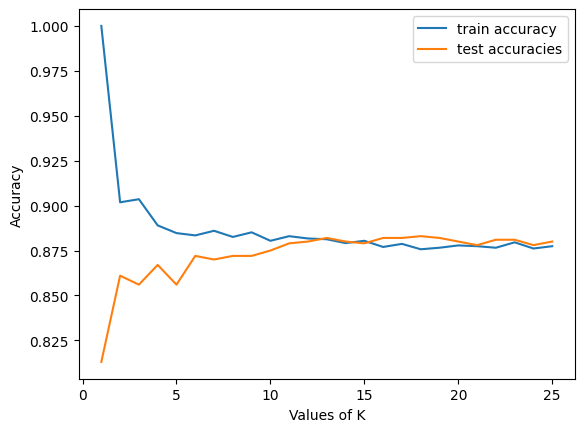

In [55]:
# Lets plot a graph of the training and test accuracies for differecnt values of k (neighbors)

train_accuracies = {}
test_accuracies = {}
neighbor = np.arange(1,26)
print(neighbor)
for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    test_accuracies[k] = knn.score(x_test,y_test)
    train_accuracies[k] = knn.score(X_train,Y_train)

import matplotlib.pyplot as plt

plt.plot(neighbor,train_accuracies.values(),label='train accuracy')
plt.plot(neighbor,test_accuracies.values(),label = 'test accuracies')
plt.xlabel('Values of K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

